# Import Libraries

In [222]:
import pandas as pd
import pandas.api.types as pdt
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc

from xgboost import XGBClassifier
from xgboost.callback import EarlyStopping

sns.set_palette(palette='Set1', n_colors=5)

# Undestand Data

In [3]:
raw_data = pd.read_csv('data/train.csv')

In [4]:
display(raw_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

None

Column descriptions:
- 'Gender', 'Age', 'Height', 'Weight' are physical attributes
- 'family_history_with_overweight' points out to familiarity with obesity
- FAVC = Frequent consumption of high caloric food
- FCVC = Frequency of consumption of vegetables
- NCP = Number of main meals
- CAEC = Consumption of food between meals
- SMOKE = tobacco usage
- CH20 = Consumption of water daily
- SCC = Calories consumption monitoring
- FAF = Physical activity frequency
- TUE = Time using technology devices
- CALC = Consumption of alcohol
-  MTRANS = Transportation used


## Distribution Of Obesity Classifications

,NObeyesdad,count
0,Obesity_Type_III,4046
1,Obesity_Type_II,3248
2,Normal_Weight,3082
3,Obesity_Type_I,2910
4,Insufficient_Weight,2523
5,Overweight_Level_II,2522
6,Overweight_Level_I,2427


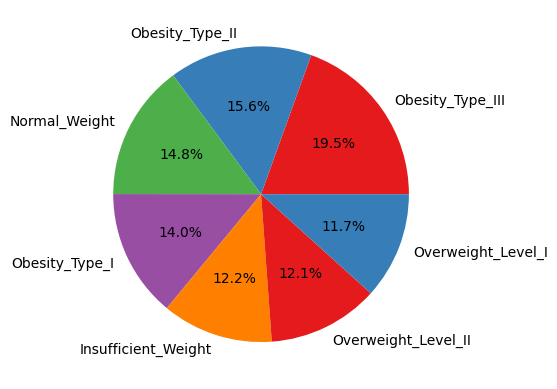

In [10]:
obesity_class_value_counts = raw_data['NObeyesdad'].value_counts().reset_index()
display(obesity_class_value_counts)

ax = plt.subplot()
ax.pie(obesity_class_value_counts['count'], autopct='%1.1f%%', labels=obesity_class_value_counts['NObeyesdad'])

plt.show()

## Gender Distribution

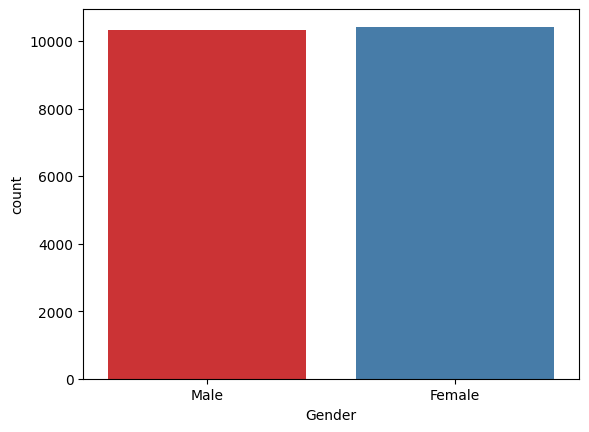

In [16]:
sns.countplot(raw_data, x='Gender', hue='Gender')
plt.show()

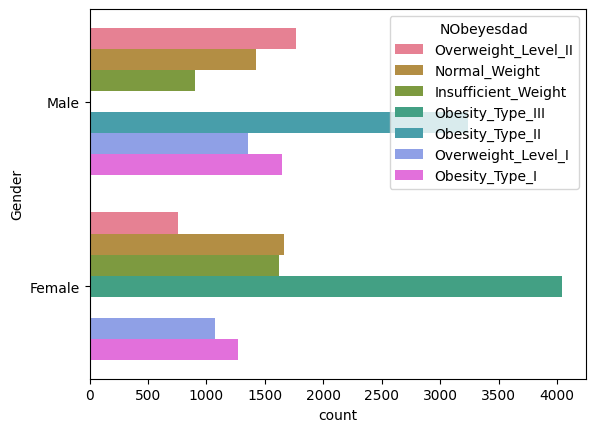

In [18]:
sns.countplot(raw_data, y='Gender', hue='NObeyesdad')
plt.show()

The data above shows that the gender of the participants in the survey has a big imapct on the type of obesity that is more prevalent for each gender.

## Age Distribution

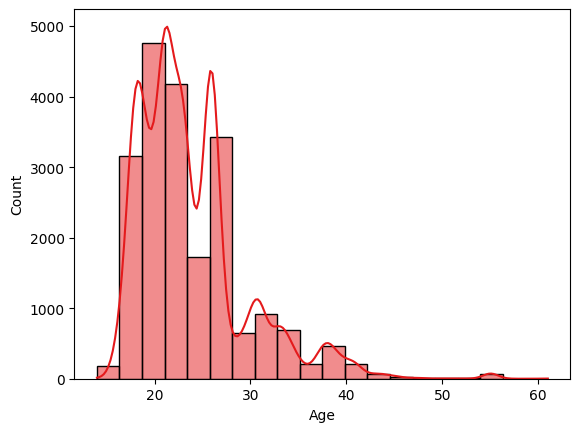

In [23]:
sns.histplot(raw_data, x='Age', bins=20, kde=True)
plt.show()

We can see that the age is skewed more towards younger populations.

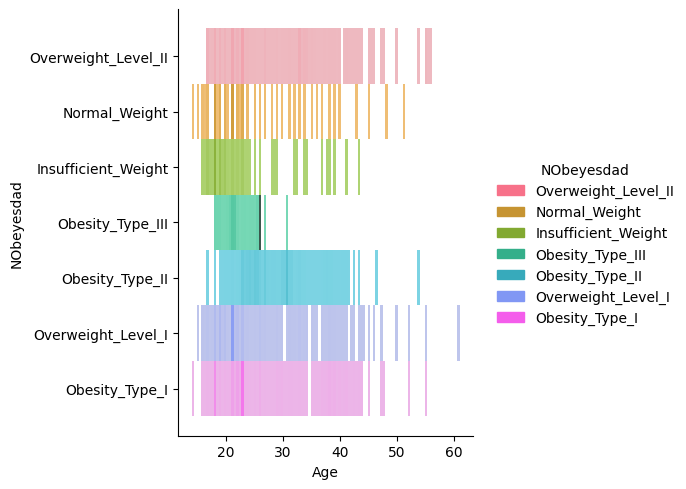

In [30]:
sns.displot(raw_data, x='Age', y='NObeyesdad', hue = 'NObeyesdad')
plt.show()

From the above distribution, we can see that age is also a very good predictor of obesity.

## Height Distribution

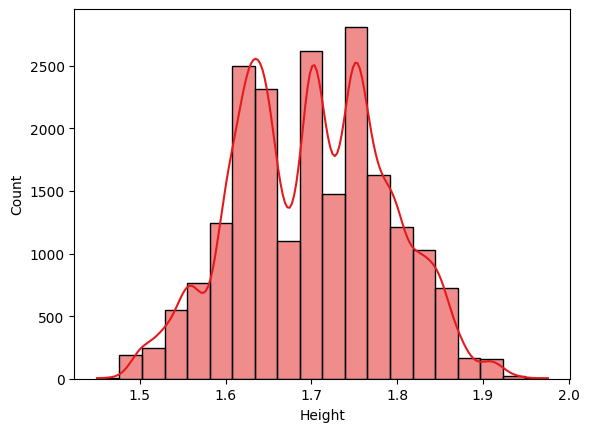

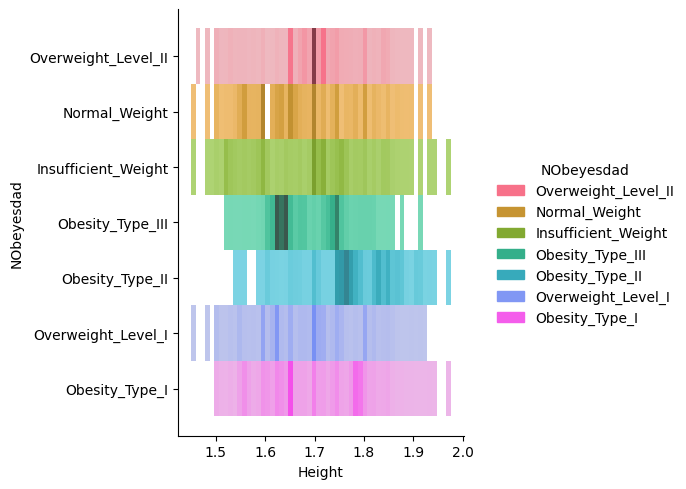

In [31]:
sns.histplot(raw_data, x='Height', bins=20, kde=True)
sns.displot(raw_data, x='Height', y='NObeyesdad', hue = 'NObeyesdad')
plt.show()

We can see that the height of the survey participants is almost nearly normally sitributed.

Additionally, the height to obesity ratio os also plotted. We can see that height is a predictor of obesity, albeit not a strong one.

## Family History Of Obesity Distribution

,family_history_with_overweight,count
0,yes,17014
1,no,3744


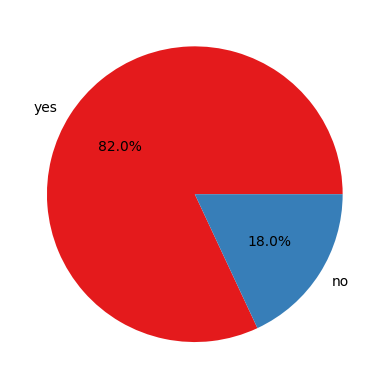

In [32]:
obesity_class_value_counts = raw_data['family_history_with_overweight'].value_counts().reset_index()
display(obesity_class_value_counts)

ax = plt.subplot()
ax.pie(obesity_class_value_counts['count'], autopct='%1.1f%%', labels=obesity_class_value_counts['family_history_with_overweight'])

plt.show()

We can see that the majority of the participants do have a history of obesity in the family. This is something we will have to consider when tuning the classification algorithm.

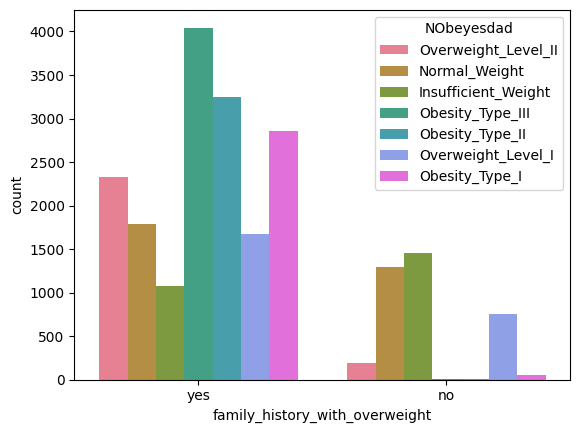

In [36]:
sns.countplot(raw_data, x='family_history_with_overweight', hue = 'NObeyesdad')
plt.show()

The above chart also shows that having a history of obesity in the family is also a strong predictor of obesity in individuals.

## Nutritional Correlation To Level Of Obesity

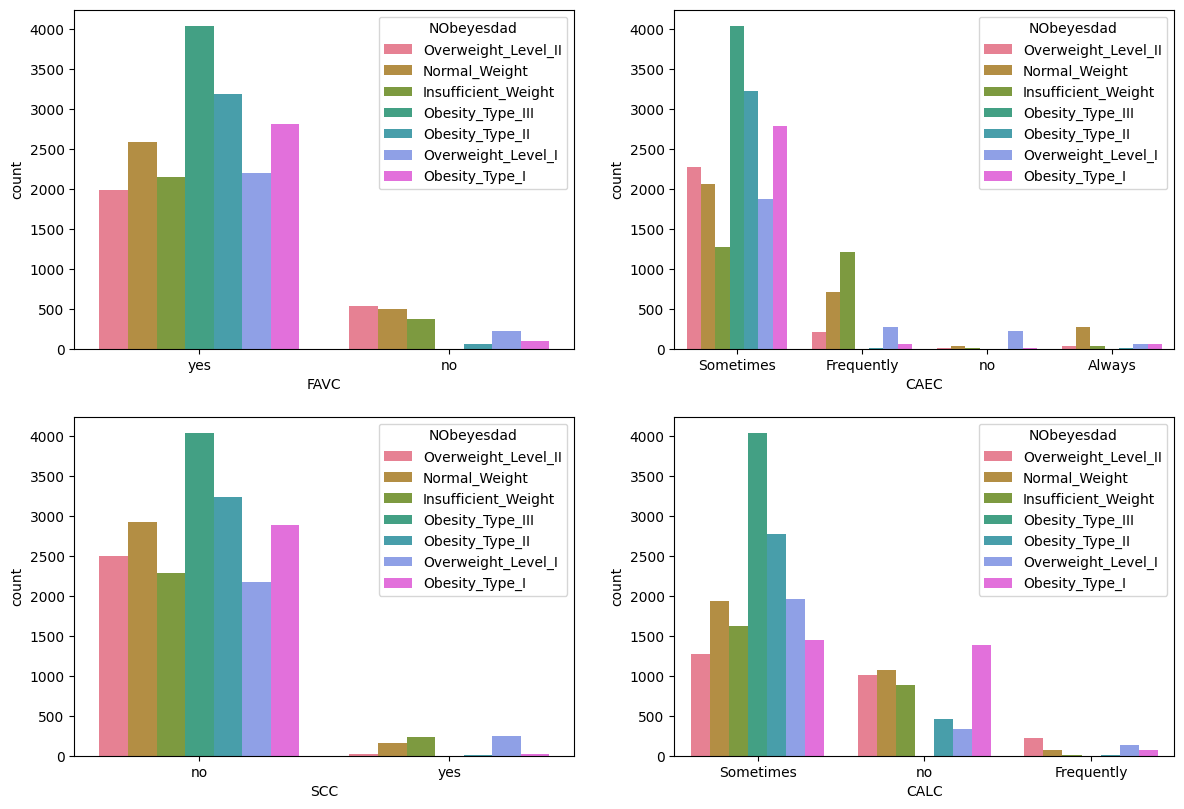

In [92]:
categorical_nutirtion_columns = ['FAVC', 'CAEC', 'SCC', 'CALC']

fig = plt.figure(figsize=(10, 6))

for i, c in enumerate(categorical_nutirtion_columns):
    ax = fig.add_subplot(len(categorical_nutirtion_columns), 2, i + 1)
    plt.subplots_adjust(bottom=-1.8, right=0.8, top=0.8, left=-0.3)
    sns.countplot(raw_data, x=c, hue='NObeyesdad', ax=ax)

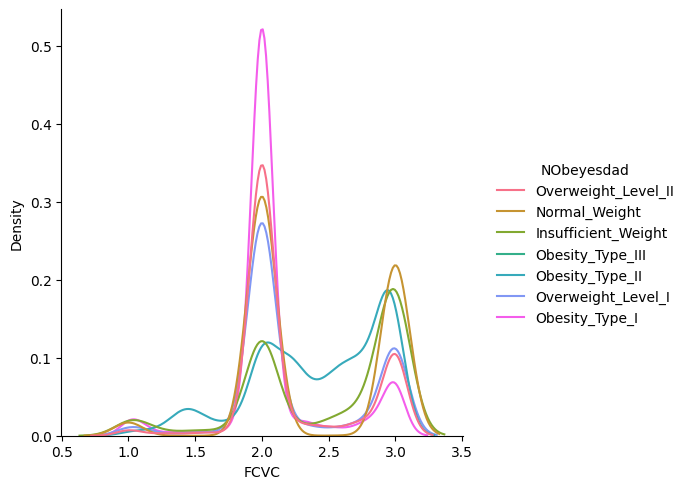

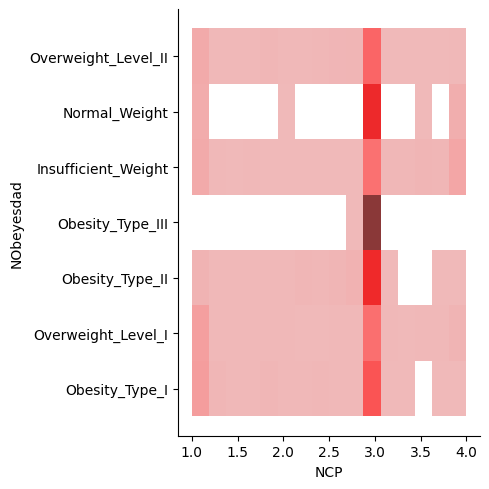

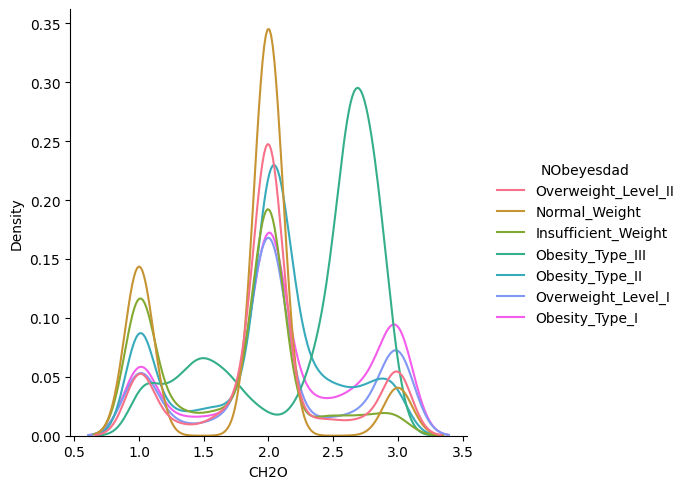

In [102]:
sns.displot(raw_data, x='FCVC', hue='NObeyesdad', kind='kde', warn_singular=False)
sns.displot(raw_data, x='NCP', y='NObeyesdad')
sns.displot(raw_data, x='CH2O', hue='NObeyesdad', kind='kde')
plt.show()

## Smoking Distribution

,SMOKE,count
0,no,20513
1,yes,245


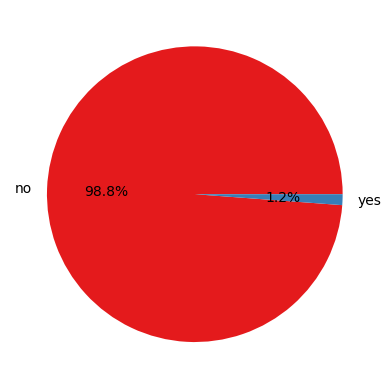

In [101]:
obesity_class_value_counts = raw_data['SMOKE'].value_counts().reset_index()
display(obesity_class_value_counts)

ax = plt.subplot()
ax.pie(obesity_class_value_counts['count'], autopct='%1.1f%%', labels=obesity_class_value_counts['SMOKE'])

plt.show()

Smokers are a very minor part of the statistical data. Hence, somking is likely to be a vary minor feature during classification.

## Physical Activity Distribuion

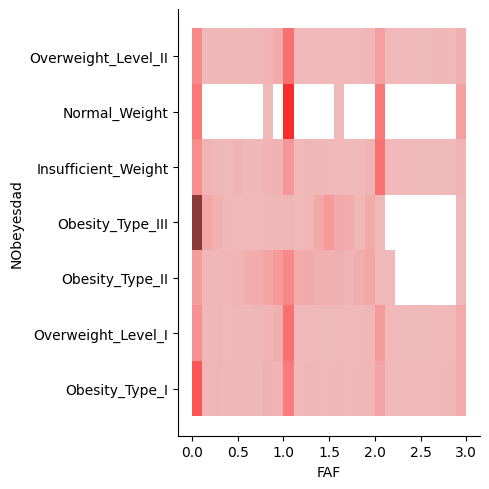

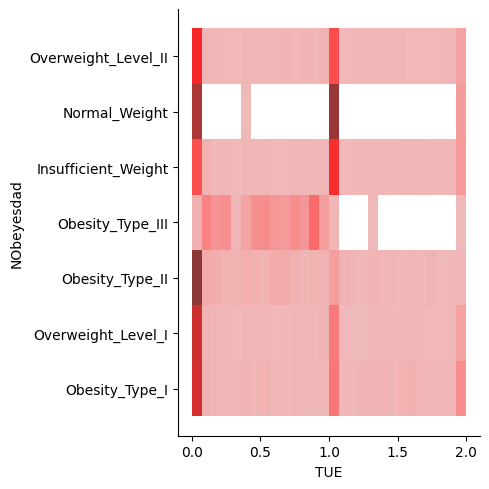

In [107]:
sns.displot(raw_data, x='FAF', y='NObeyesdad')
sns.displot(raw_data, x='TUE', y='NObeyesdad')
plt.show()

As exepcted, physical activity (`FAF`) is a great predictor for the levels of obesity.

Similarly, the time spent on technology (`TUE`) is also a great predictor.

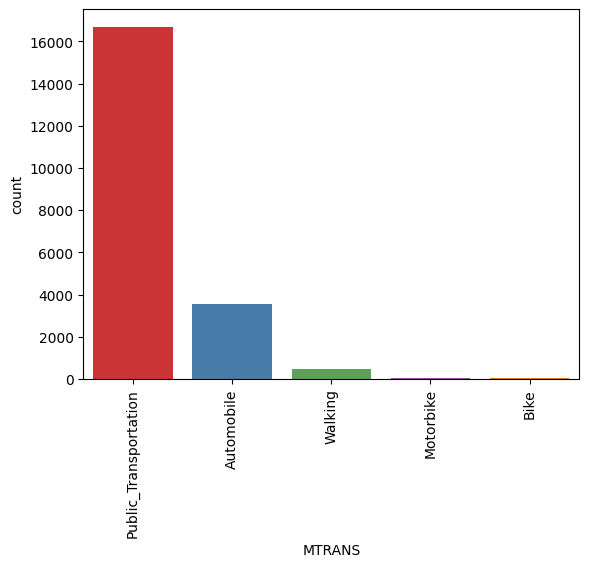

In [114]:
sns.countplot(raw_data, x='MTRANS', hue='MTRANS')
plt.xticks(rotation=90)
plt.show()

It is evident that the majority of the participants lead a versy sedentary life.

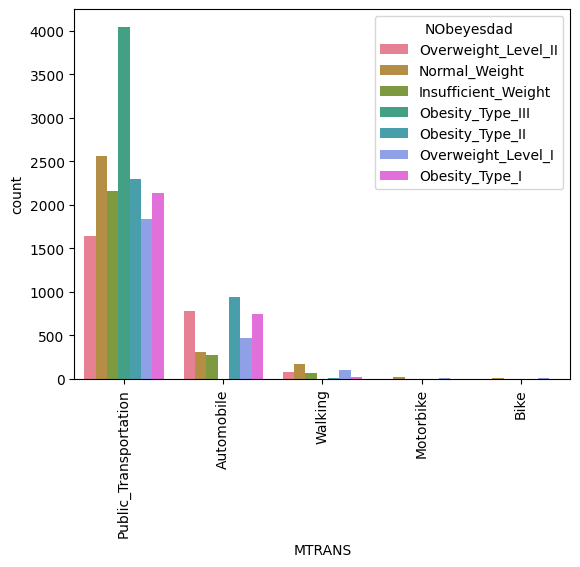

In [110]:
ax = sns.countplot(raw_data, x='MTRANS', hue='NObeyesdad')
plt.xticks(rotation=90)
plt.show()

We can see that those with a sendatary liefestyle are by far the likeliest to be obese.

However, given that the majority of participants use the public transport, the `MTRANS` feature is likely to be low on importance during classification.

# Data Analysis

Firstly, we need to encode the data and handle missing values.

## Handle Missing Values

In [141]:
missing_data_df = {}

for c in raw_data.columns:
    missing_data_df[c] = raw_data[c].isna().sum() / raw_data[c].shape[0]

display(missing_data_df)

{'id': 0.0,
 'Gender': 0.0,
 'Age': 0.0,
 'Height': 0.0,
 'Weight': 0.0,
 'family_history_with_overweight': 0.0,
 'FAVC': 0.0,
 'FCVC': 0.0,
 'NCP': 0.0,
 'CAEC': 0.0,
 'SMOKE': 0.0,
 'CH2O': 0.0,
 'SCC': 0.0,
 'FAF': 0.0,
 'TUE': 0.0,
 'CALC': 0.0,
 'MTRANS': 0.0,
 'NObeyesdad': 0.0}

As we can see, there is no missing data in the training dataset.

## Encode Data

In [187]:
X_enc = OneHotEncoder(sparse_output=False)
categorical_columns = [c for c in raw_data.columns if pdt.is_object_dtype(raw_data[c])]
categorical_columns.remove('NObeyesdad')

discrete_columns = [c for c in raw_data.columns if pdt.is_numeric_dtype(raw_data[c])]
discrete_columns.remove('id')

# Encode the categorical columns
encoded_matrix = X_enc.fit_transform(raw_data[categorical_columns])
encoded_df = pd.DataFrame(encoded_matrix, columns=X_enc.get_feature_names_out())

# Create a new DatafRame with the discrete columns and the new encoded columns
X = pd.concat([raw_data[discrete_columns], encoded_df], axis=1)
display(X.head())

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [257]:
y_label_enc = LabelEncoder()
y_enc_data = y_label_enc.fit_transform(raw_data['NObeyesdad'])

y = pd.DataFrame(y_enc_data, columns=['NObeyesdad'])
display(y)

,NObeyesdad
0,6
1,1
2,0
3,4
4,6
...,...
20753,3
20754,0
20755,3
20756,6


## Run Baseline analysis

In [245]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42, 
                                                    stratify=y,
                                                    train_size=0.8)

In [194]:
clf = XGBClassifier(n_estimators=300,
                    learning_rate=0.1,
                    max_depth=5,
                    gamma = 0.0,
                    subsample = 0.8,
                    colsample_bytree = 0.8,
                    min_child_weight = 0.5, 
                    random_state = 42,
                    early_stopping_rounds = 20,
                    eval_metric='aucpr')

In [246]:
clf.fit(X_train,
        y_train,
        verbose=True,
        eval_set=[(X_test, y_test)])

[0]	validation_0-aucpr:0.81393
[1]	validation_0-aucpr:0.88418
[2]	validation_0-aucpr:0.89441
[3]	validation_0-aucpr:0.89746
[4]	validation_0-aucpr:0.90109
[5]	validation_0-aucpr:0.90478
[6]	validation_0-aucpr:0.90712
[7]	validation_0-aucpr:0.91052
[8]	validation_0-aucpr:0.91311
[9]	validation_0-aucpr:0.91375
[10]	validation_0-aucpr:0.91452
[11]	validation_0-aucpr:0.91516
[12]	validation_0-aucpr:0.91726
[13]	validation_0-aucpr:0.91885
[14]	validation_0-aucpr:0.91964
[15]	validation_0-aucpr:0.92001
[16]	validation_0-aucpr:0.92069
[17]	validation_0-aucpr:0.92156
[18]	validation_0-aucpr:0.92229
[19]	validation_0-aucpr:0.92285
[20]	validation_0-aucpr:0.92406
[21]	validation_0-aucpr:0.92499
[22]	validation_0-aucpr:0.92547
[23]	validation_0-aucpr:0.92591
[24]	validation_0-aucpr:0.92641
[25]	validation_0-aucpr:0.92677
[26]	validation_0-aucpr:0.92728
[27]	validation_0-aucpr:0.92782
[28]	validation_0-aucpr:0.92847
[29]	validation_0-aucpr:0.92945
[30]	validation_0-aucpr:0.92985
[31]	validation_0-

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=20,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=0.5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [247]:
display(clf.best_score)

0.9501967357640101

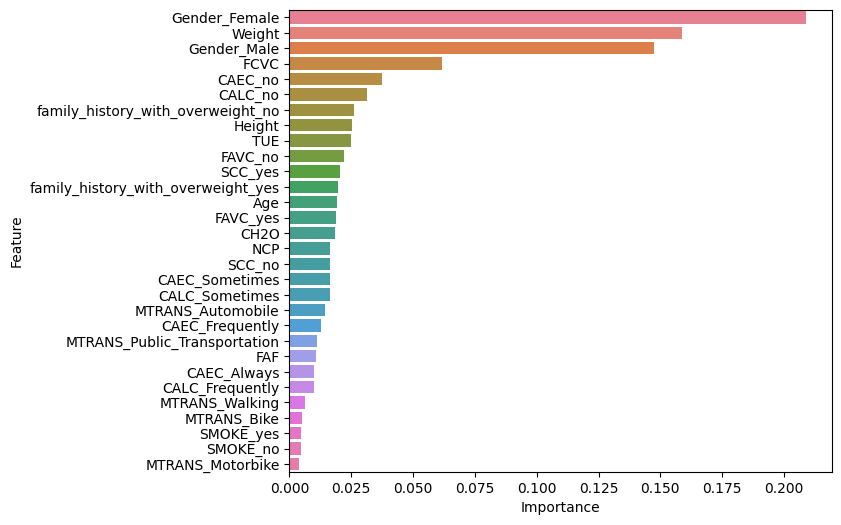

In [248]:
feature_importances = clf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X_train.columns.values,
                                       'Importance': feature_importances})\
                                .sort_values('Importance', ascending=False)

fig, ax = plt.subplots(figsize=(7, 6))
sns.barplot(feature_importances_df, x = 'Importance', y = 'Feature', hue = 'Feature')
plt.show()

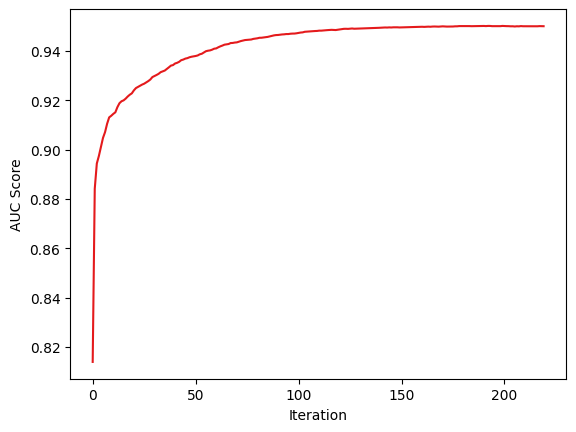

In [249]:
train_history = pd.DataFrame(clf.evals_result()['validation_0']).reset_index()

ax = sns.lineplot(train_history, y='aucpr', x='index')
ax.set(xlabel='Iteration', ylabel='AUC Score')
plt.show()

In [275]:
predictions = clf.predict_proba(X_test)

y_test_categories_df = pd.DataFrame(y_label_enc.inverse_transform(y_test), columns=['NObeyesdad'])

y_ohe_enc = OneHotEncoder(sparse_output=False)
y_test_enc = pd.DataFrame(y_ohe_enc.fit_transform(y_test_categories_df[['NObeyesdad']]), columns=y_ohe_enc.get_feature_names_out())

fpr = dict()
tpr = dict()
roc_auc = dict()
for i, c in enumerate(y_test_enc.columns.values):
    fpr[c], tpr[c], _ = roc_curve(y_test_enc.iloc[:, i], predictions[:, i])
    roc_auc[c] = auc(fpr[c], tpr[c])

display(roc_auc)

/home/mshtarbev/development/ml-projects/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:153: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'NObeyesdad_Insufficient_Weight': 0.9982885702883423,
 'NObeyesdad_Normal_Weight': 0.9909348286067319,
 'NObeyesdad_Obesity_Type_I': 0.988544764985032,
 'NObeyesdad_Obesity_Type_II': 0.9978579273382243,
 'NObeyesdad_Obesity_Type_III': 0.9999219815070289,
 'NObeyesdad_Overweight_Level_I': 0.9791509113042206,
 'NObeyesdad_Overweight_Level_II': 0.982869500139237}

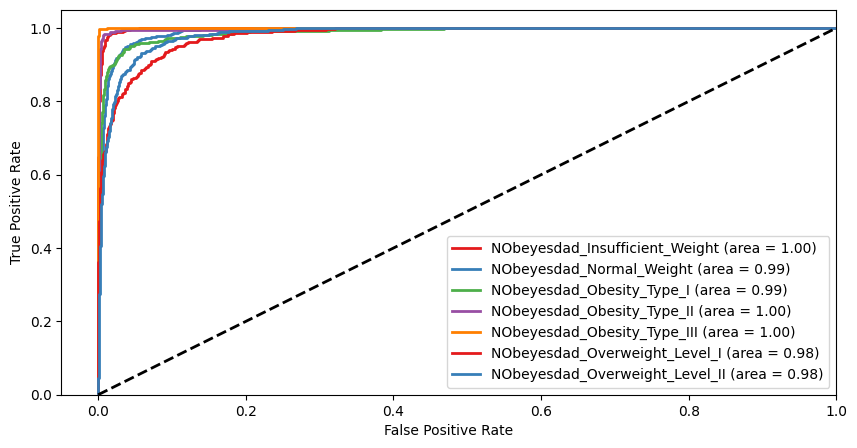

In [284]:
fig, ax = plt.subplots(figsize=(10, 5))

for c in y_test_enc.columns.values:
    plt.plot(fpr[c], tpr[c], lw=2, label='{0} (area = {1:0.2f})'.format(c, roc_auc[c]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()